Importing necessary libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Loading and Cleaning the dataset

In [21]:
# Dropping unnecessary columns for simplicity
data = pd.read_csv('/content/breast cancer (1).csv')
data.drop(columns=['id', 'Unnamed: 32'], inplace=True)

# Map diagnosis to binary labels (Malignant = 1, Benign = 0)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Separating features and target variable
features = data.drop(columns=['diagnosis'])
target = data['diagnosis']


The dataset consists of various features describing cell nuclei characteristics, with 'diagnosis'
as the target variable indicating cancer type (Malignant = 1, Benign = 0).

Splitting the Data

In [22]:
# Using a slightly larger test size for a stronger evaluation sample
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

# Standardize feature values to bring them to a common scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

SVM (Support Vector Machine) is well-suited for cancer prediction due to its robustness with high-dimensional data.
We test three different kernel types: linear, polynomial, and RBF to determine which fits the dataset best.

Training SVM Models with Different Kernels

In [23]:
# Trying out multiple kernels (just for comparison)
kernels = ['linear', 'poly', 'rbf']
svm_accuracies = {}
for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train, y_train)
    predictions = svm.predict(X_test)
    svm_accuracies[kernel] = accuracy_score(y_test, predictions)
    print(f"SVM ({kernel.capitalize()} Kernel) Accuracy: {svm_accuracies[kernel]:.2f}")


SVM (Linear Kernel) Accuracy: 0.97
SVM (Poly Kernel) Accuracy: 0.90
SVM (Rbf Kernel) Accuracy: 0.97


Training Random Forest Model

In [24]:
rf_model = RandomForestClassifier(n_estimators=120, random_state=42, max_depth=8)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("\nRandom Forest Model Accuracy:", rf_accuracy)



Random Forest Model Accuracy: 0.965034965034965


Neural Networks are valuable for cancer type prediction because they capture non-linear relationships.
Here, we use grid search to optimize the hyperparameters of our neural network model

Neural Network Model with Grid Search

In [25]:
# Tuning hyperparameters with GridSearchCV
nn_params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'max_iter': [300, 500]
}

# Running grid search to find the best Neural Network configuration
nn_model = MLPClassifier(random_state=42)
grid_search = GridSearchCV(nn_model, nn_params, cv=3, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_nn = grid_search.best_estimator_
nn_pred = best_nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_pred)
print("\nBest Neural Network Model Accuracy:", nn_accuracy)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Best Neural Network Model Accuracy: 0.9790209790209791


<ipython-input-26-a9e27f9c78b5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


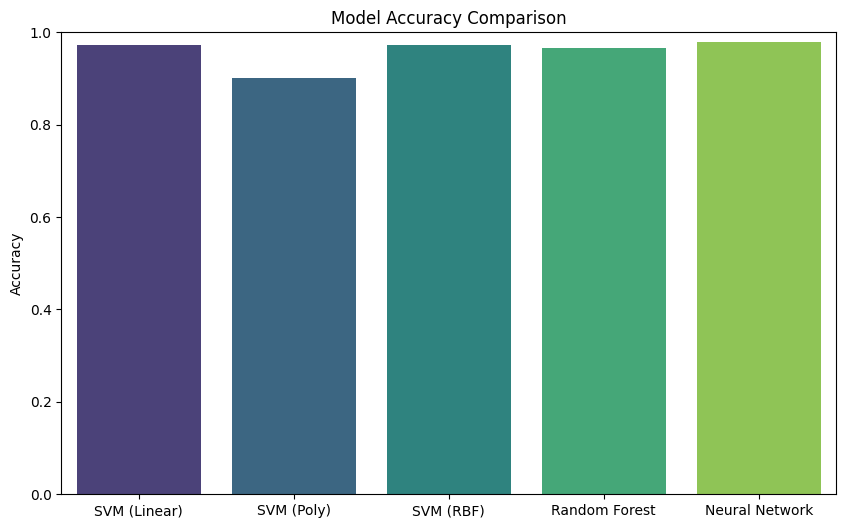

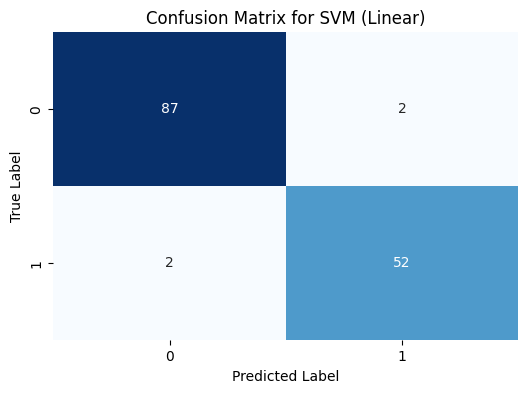

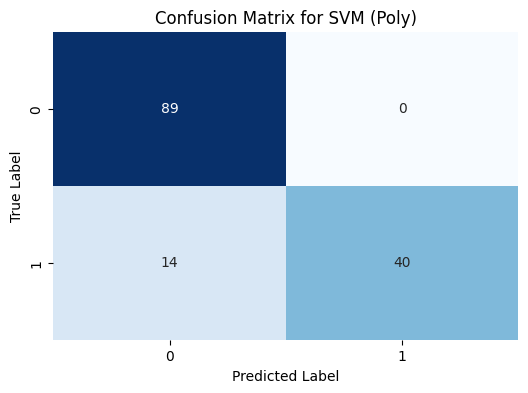

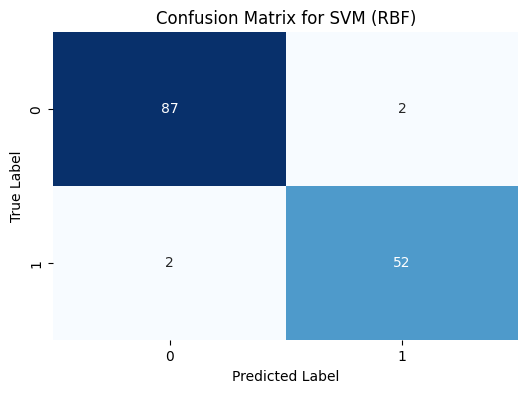

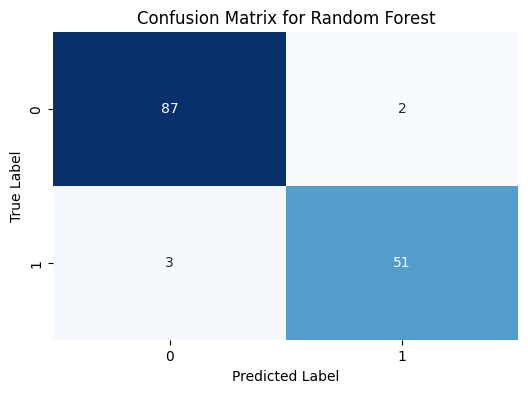

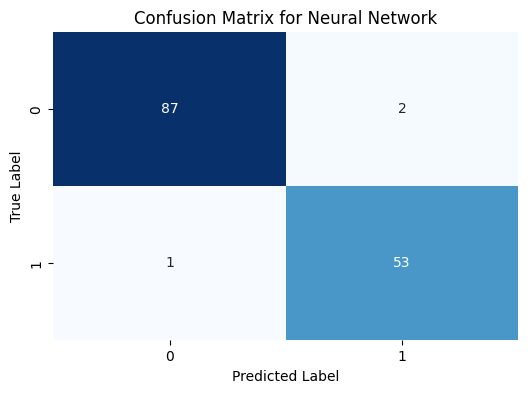

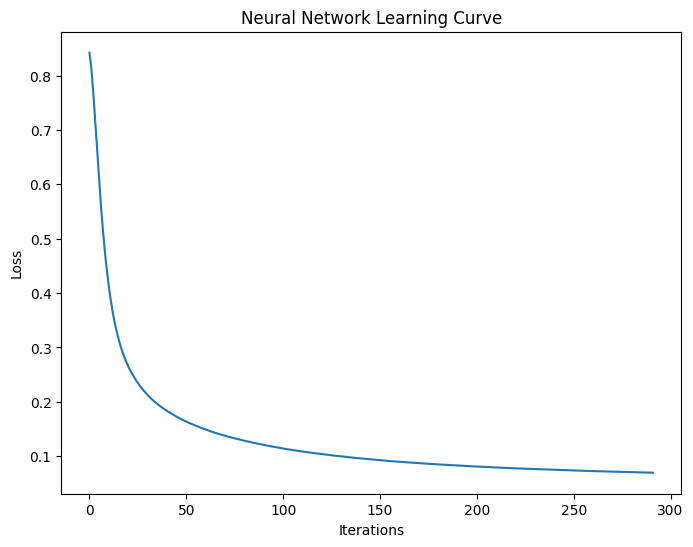

In [26]:
model_names = ['SVM (Linear)', 'SVM (Poly)', 'SVM (RBF)', 'Random Forest', 'Neural Network']
accuracies = [svm_accuracies['linear'], svm_accuracies['poly'], svm_accuracies['rbf'], rf_accuracy, nn_accuracy]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(SVC(kernel='linear', random_state=42).fit(X_train, y_train), X_test, y_test, 'SVM (Linear)')
plot_confusion_matrix(SVC(kernel='poly', random_state=42).fit(X_train, y_train), X_test, y_test, 'SVM (Poly)')
plot_confusion_matrix(SVC(kernel='rbf', random_state=42).fit(X_train, y_train), X_test, y_test, 'SVM (RBF)')
plot_confusion_matrix(rf_model, X_test, y_test, 'Random Forest')
plot_confusion_matrix(best_nn, X_test, y_test, 'Neural Network')

# Visualization: Learning Curve for Neural Network
plt.figure(figsize=(8, 6))
plt.plot(best_nn.loss_curve_)
plt.title("Neural Network Learning Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

In [27]:
# Comparison Summary
print("\nModel Comparison Summary:")
print(f"SVM (Linear Kernel) Accuracy: {svm_accuracies['linear']:.2f}")
print(f"SVM (Polynomial Kernel) Accuracy: {svm_accuracies['poly']:.2f}")
print(f"SVM (RBF Kernel) Accuracy: {svm_accuracies['rbf']:.2f}")
print("Random Forest Accuracy:", rf_accuracy)
print("Neural Network Accuracy:", nn_accuracy)


Model Comparison Summary:
SVM (Linear Kernel) Accuracy: 0.97
SVM (Polynomial Kernel) Accuracy: 0.90
SVM (RBF Kernel) Accuracy: 0.97
Random Forest Accuracy: 0.965034965034965
Neural Network Accuracy: 0.9790209790209791



1. Cancer type prediction is crucial for early diagnosis and patient treatment planning. In real-world applications,
2. SVMs are preferred for interpretability, Random Forests for robustness, and Neural Networks for complex pattern recognition.
3. Depending on the healthcare setting, a balance between accuracy, computation, and interpretability
is essential.

In [28]:
# Print a general conclusion on which model worked best
if max(svm_accuracies.values()) > max(rf_accuracy, nn_accuracy):
    best_model = 'SVM'
elif rf_accuracy > nn_accuracy:
    best_model = 'Random Forest'
else:
    best_model = 'Neural Network'

print(f"\nConclusion: The best model for predicting cancer types in this dataset was {best_model}.")



Conclusion: The best model for predicting cancer types in this dataset was Neural Network.
